In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q findspark


import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession\
        .builder\
        .getOrCreate()

In [ ]:
from pyspark.sql import DataFrame
import numpy as np
import pandas as pd

In [ ]:
meal = spark.read.format("csv") \
  .option("header", "true")  \
  .option("sep", ",") \
  .load("/content/Meal Info.csv")

train = spark.read.format("csv") \
  .option("header", "true")  \
  .option("sep", ",") \
  .load("/content/Train.csv")

centerinfo = spark.read.format("csv") \
  .option("header", "true")  \
  .option("sep", ",") \
  .load("/content/Fulfilment Center Info.csv")


In [ ]:
meal = meal.toPandas()
train = train.toPandas()
centerinfo = centerinfo.toPandas()

In [ ]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.5,437.53,0,0,54
4,1448490,1,55,2631,243.5,242.5,0,0,40


In [ ]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [ ]:
centerinfo.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [ ]:
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,456548,456548,456548,456548,456548,456548,456548,456548,456548
unique,456548,145,77,51,1992,1907,2,2,1250
top,1379560,122,13,2290,290.03,292.03,0,0,13
freq,1,3359,7046,11138,7342,9513,419498,406693,12397


In [ ]:
meal.describe()

,meal_id,category,cuisine
count,51,51,51
unique,51,14,4
top,1885,Beverages,Thai
freq,1,12,15


In [ ]:
## Understanding datatypes:
print(train.dtypes)
print(meal.dtypes)
print(centerinfo.dtypes)

id                       object
week                     object
center_id                object
meal_id                  object
checkout_price           object
base_price               object
emailer_for_promotion    object
homepage_featured        object
num_orders               object
dtype: object
meal_id     object
category    object
cuisine     object
dtype: object
center_id      object
city_code      object
region_code    object
center_type    object
op_area        object
dtype: object


In [ ]:
##Checking null values
print(train.isna().sum())
print(meal.isna().sum())
print(centerinfo.isna().sum())

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64
meal_id     0
category    0
cuisine     0
dtype: int64
center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64


In [ ]:
##Counting values of dataset
print(train.shape)
print(meal.shape)
print(centerinfo.shape)

(456548, 9)
(51, 3)
(77, 5)


In [ ]:
print(pd.unique(train['id']).shape)
print(pd.unique(meal['meal_id']).shape)
print(pd.unique(centerinfo['center_id']).shape)

(456548,)
(51,)
(77,)


In [ ]:
import matplotlib.pyplot as plt
###Outlier Detection
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
##Removing Outlier
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


(456548, 9)

# New Section

# New Section

In [ ]:
def outlinefree(dataCol):     
      
    sorted(dataCol)                          # sort column
    Q1,Q3 = np.percentile(dataCol,[25,75])   # getting 25% and 75% percentile
    IQR = Q3-Q1                              # getting IQR 
    LowerRange = Q1-(1.5 * IQR)              # getting Lowrange
    UpperRange = Q3+(1.5 * IQR)              # getting Upperrange 
    
    colname = dataCol.tolist()               # convert column into list  
    newlist =[]                              # empty list for store new values
    for i in range(len(colname)):
        
        if colname[i] > UpperRange:          # list number > Upperrange 
            colname[i] = UpperRange          # then number = Upperrange
            newlist.append(colname[i])       # append value to empty list
        elif colname[i] < LowerRange:        # list number < Lowrange 
            colname[i] = LowerRange          # then number = Lowrange
            newlist.append(colname[i])       # append value to empty list 
        else:
            colname[i]                       # list number
            newlist.append(colname[i])       # append value to empty list
            
        

    return newlist

In [ ]:
train_cat = train[['center_id','meal_id','emailer_for_promotion','homepage_featured']]
train_num = train[['week','checkout_price']]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   id                     456548 non-null  object
 1   week                   456548 non-null  object
 2   center_id              456548 non-null  object
 3   meal_id                456548 non-null  object
 4   checkout_price         456548 non-null  object
 5   base_price             456548 non-null  object
 6   emailer_for_promotion  456548 non-null  object
 7   homepage_featured      456548 non-null  object
 8   num_orders             456548 non-null  object
dtypes: object(9)
memory usage: 34.8+ MB


In [ ]:
train_num['week'] = train_num['week'].astype(float)
train_num['checkout_price'] = train_num['checkout_price'].astype(float)
train['week'] = train['week'].astype(float)
train['checkout_price'] = train['checkout_price'].astype(float)
train['center_id'] = train['center_id'].astype(float)
train['meal_id'] = train['meal_id'].astype(float)
train['num_orders'] = train['num_orders'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train['base_price'] = train['base_price'].astype(float)
train['emailer_for_promotion'] = train['emailer_for_promotion'].astype(float)
train['homepage_featured'] = train['homepage_featured'].astype(float)

In [ ]:
for i in range(len(train_num.columns)):
    new_list =  outlinefree(train.loc[:,train_num.columns[i]]) # retrun new list
    train.loc[:,train_num.columns[i]] = new_list 

In [ ]:
def center_id(datacol):
    center_id_val_index_n = []
    for i in datacol:
        if i >= 10 and i <= 30:
            center_id_val_index_n.append("10-30")
        elif i >= 31 and i <=50:
            center_id_val_index_n.append("31-50")
        elif i >= 51 and i <=70:
            center_id_val_index_n.append("51-70")  
        elif i >= 71 and i <=90:
            center_id_val_index_n.append("71-90")
        elif i >= 91 and i <=110:
            center_id_val_index_n.append("91-110") 
        elif i >= 111 and i <=130:
            center_id_val_index_n.append("111-130")
        elif i >= 131 and i <=150:
            center_id_val_index_n.append("131-150")          
        else:
            center_id_val_index_n.append("151-190")
    
    return  center_id_val_index_n 

center_id_val_index_n = center_id(train.center_id) 
train.center_id = center_id_val_index_n

In [ ]:
def meal_id(datacol):        
    meal_id_val_index_n = []
    for i in datacol:
        if i >= 1000 and i <= 1300:
            meal_id_val_index_n.append("1000-1300")
        elif i >= 1301 and i <=1600:
            meal_id_val_index_n.append("1301-1600")
        elif i >= 1601 and i <=1900:
            meal_id_val_index_n.append("1601-1900")  
        elif i >= 1901 and i <=2200:
            meal_id_val_index_n.append("1901-2200")
        elif i >= 2201 and i <=2500:
            meal_id_val_index_n.append("2201-2500") 
        elif i >= 2501 and i <=2800:
            meal_id_val_index_n.append("2501-2800")          
        else:
            meal_id_val_index_n.append("2801-3000") 
    return  meal_id_val_index_n

meal_id_val_index_n = meal_id(train.meal_id)
train.meal_id = meal_id_val_index_n

In [ ]:
f_train = train.loc[:,['num_orders','week','center_id','meal_id','checkout_price','base_price','emailer_for_promotion',
                 'homepage_featured']]
final_train = pd.get_dummies(f_train)

In [ ]:
final_train.head()

,num_orders,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,center_id_10-30,center_id_111-130,center_id_131-150,center_id_151-190,...,center_id_51-70,center_id_71-90,center_id_91-110,meal_id_1000-1300,meal_id_1301-1600,meal_id_1601-1900,meal_id_1901-2200,meal_id_2201-2500,meal_id_2501-2800,meal_id_2801-3000
0,177.0,1.0,136.83,152.29,0.0,0.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,270.0,1.0,136.83,135.83,0.0,0.0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,189.0,1.0,134.86,135.86,0.0,0.0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,54.0,1.0,339.50,437.53,0.0,0.0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,40.0,1.0,243.50,242.50,0.0,0.0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
features = final_train.iloc[:,1:].values
label = final_train.iloc[:,:1].values 

In [ ]:
final_train.head()

,num_orders,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,center_id_10-30,center_id_111-130,center_id_131-150,center_id_151-190,...,center_id_51-70,center_id_71-90,center_id_91-110,meal_id_1000-1300,meal_id_1301-1600,meal_id_1601-1900,meal_id_1901-2200,meal_id_2201-2500,meal_id_2501-2800,meal_id_2801-3000
0,177.0,1.0,136.83,152.29,0.0,0.0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,270.0,1.0,136.83,135.83,0.0,0.0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,189.0,1.0,134.86,135.86,0.0,0.0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,54.0,1.0,339.50,437.53,0.0,0.0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,40.0,1.0,243.50,242.50,0.0,0.0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
# from pyspark.sql import functions as F  
from pyspark.ml.regression import LinearRegression, RandomForestRegressor,DecisionTreeRegressor
from pyspark.ml import Pipeline
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder

In [ ]:
# inputdata = spark.sql("select * from Input_Final where life_point=0 ")

In [ ]:
inputdata=spark.createDataFrame(final_train) 
inputdata.printSchema()
inputdata.show()

root
 |-- num_orders: double (nullable = true)
 |-- week: double (nullable = true)
 |-- checkout_price: double (nullable = true)
 |-- base_price: double (nullable = true)
 |-- emailer_for_promotion: double (nullable = true)
 |-- homepage_featured: double (nullable = true)
 |-- center_id_10-30: long (nullable = true)
 |-- center_id_111-130: long (nullable = true)
 |-- center_id_131-150: long (nullable = true)
 |-- center_id_151-190: long (nullable = true)
 |-- center_id_31-50: long (nullable = true)
 |-- center_id_51-70: long (nullable = true)
 |-- center_id_71-90: long (nullable = true)
 |-- center_id_91-110: long (nullable = true)
 |-- meal_id_1000-1300: long (nullable = true)
 |-- meal_id_1301-1600: long (nullable = true)
 |-- meal_id_1601-1900: long (nullable = true)
 |-- meal_id_1901-2200: long (nullable = true)
 |-- meal_id_2201-2500: long (nullable = true)
 |-- meal_id_2501-2800: long (nullable = true)
 |-- meal_id_2801-3000: long (nullable = true)

+----------+----+-------------

Using Linear Regression to predict number of orders 

In [ ]:
Assembler = VectorAssembler(inputCols = ['week', 'checkout_price', 'base_price', 'emailer_for_promotion',
       'homepage_featured', 'center_id_10-30', 'center_id_111-130',
       'center_id_131-150', 'center_id_151-190', 'center_id_31-50',
       'center_id_51-70', 'center_id_71-90', 'center_id_91-110',
       'meal_id_1000-1300', 'meal_id_1301-1600', 'meal_id_1601-1900',
       'meal_id_1901-2200', 'meal_id_2201-2500', 'meal_id_2501-2800',
       'meal_id_2801-3000'], 
                                outputCol ='features')
output = Assembler.transform(inputdata)
finalData = output.select('features','num_orders')
trainData, testData = finalData.randomSplit([0.7, 0.3], seed=1)
lrModel = LinearRegression(labelCol ='num_orders', featuresCol='features')
lrEstimator = lrModel.fit(trainData)
testResults = lrEstimator.evaluate(testData)
rmse = testResults.rootMeanSquaredError
mse = rmse**2
print(mse)
r2 = testResults.r2adj
print(r2)

128101.98010863618
0.2084700746399779


In [ ]:
Results = testResults.predictions.toPandas()

In [ ]:
Results = Results[['num_orders','prediction']]
Results.columns = ['num_orders','LinReg_prediction']

In [ ]:
Results.head()

,num_orders,LinReg_prediction
0,486.0,929.722582
1,1147.0,929.722582
2,431.0,798.687354
3,311.0,798.017512
4,95.0,617.315040


In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml import Pipeline

Using Decision Tree Regressor

In [ ]:
dtModel = DecisionTreeRegressor(labelCol ='num_orders', featuresCol='features')
dtEstimator = dtModel.fit(trainData)
predictions_dt = dtEstimator.transform(testData)
evaluator = RegressionEvaluator(labelCol="num_orders", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions_dt)
mse = rmse**2
print(mse)
evaluator1 = RegressionEvaluator(labelCol="num_orders", predictionCol="prediction", metricName='r2')
r2 = evaluator1.evaluate(predictions_dt)
print(r2)

112303.10622975169
0.30619099530733496


In [ ]:
Results1 = predictions_dt.toPandas()
Results1 = Results1[['num_orders','prediction']]
Results1.columns = ['num_orders','DT_prediction']
Results1.head()

,num_orders,DT_prediction
0,486.0,1673.354193
1,1147.0,1673.354193
2,431.0,388.277253
3,311.0,388.277253
4,95.0,388.277253


In [ ]:
Results['DT_prediction'] = Results1['DT_prediction']
Results.head()

,num_orders,LinReg_prediction,DT_prediction
0,486.0,929.722582,1673.354193
1,1147.0,929.722582,1673.354193
2,431.0,798.687354,388.277253
3,311.0,798.017512,388.277253
4,95.0,617.315040,388.277253


In [ ]:
dtEstimator.featureImportances

SparseVector(20, {0: 0.0107, 1: 0.3686, 2: 0.0392, 3: 0.1668, 4: 0.2708, 15: 0.0529, 16: 0.0373, 17: 0.0118, 18: 0.042})

In [ ]:
def ExtractFeatureImp(featureImp, dataset, featuresCol):
    list_extract = []
    for i in dataset.schema[featuresCol].metadata["ml_attr"]["attrs"]:
        list_extract = list_extract + dataset.schema[featuresCol].metadata["ml_attr"]["attrs"][i]
    varlist = pd.DataFrame(list_extract)
    varlist['score'] = varlist['idx'].apply(lambda x: featureImp[x])
    return(varlist.sort_values('score', ascending = False))

In [ ]:
ExtractFeatureImp(dtEstimator.featureImportances, predictions_dt, "features").head(10)

,idx,name,score
1,1,checkout_price,0.368576
4,4,homepage_featured,0.270793
3,3,emailer_for_promotion,0.166796
15,15,meal_id_1601-1900,0.052858
18,18,meal_id_2501-2800,0.041991
2,2,base_price,0.039175
16,16,meal_id_1901-2200,0.037344
17,17,meal_id_2201-2500,0.011806
0,0,week,0.010661
12,12,center_id_91-110,0.000000


Using Random Forest Regressor

In [ ]:
rfModel = RandomForestRegressor(labelCol ='num_orders', featuresCol='features',numTrees=200)
rfEstimator = rfModel.fit(trainData)
predictions_rf = rfEstimator.transform(testData)
evaluator = RegressionEvaluator(labelCol="num_orders", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions_rf)
mse = rmse**2
print(mse)
evaluator1 = RegressionEvaluator(labelCol="num_orders", predictionCol="prediction", metricName='r2')
r2 = evaluator1.evaluate(predictions_rf)
print(r2)

107397.2445310667
0.39849009635733246


In [ ]:
rfEstimator.featureImportances

SparseVector(20, {0: 0.0146, 1: 0.27, 2: 0.1593, 3: 0.2039, 4: 0.2252, 5: 0.0035, 6: 0.0001, 7: 0.0, 8: 0.0005, 9: 0.0001, 10: 0.0, 11: 0.0006, 12: 0.0001, 13: 0.0029, 14: 0.0137, 15: 0.0426, 16: 0.0129, 17: 0.0158, 18: 0.032, 19: 0.002})

In [ ]:
ExtractFeatureImp(rfEstimator.featureImportances, predictions_rf, "features").head(10)

,idx,name,score
1,1,checkout_price,0.269988
4,4,homepage_featured,0.225167
3,3,emailer_for_promotion,0.203894
2,2,base_price,0.159265
15,15,meal_id_1601-1900,0.042598
18,18,meal_id_2501-2800,0.032032
17,17,meal_id_2201-2500,0.015798
0,0,week,0.014611
14,14,meal_id_1301-1600,0.013693
16,16,meal_id_1901-2200,0.012876


In [ ]:
Results2 = predictions_rf.toPandas()
Results2 = Results2[['num_orders','prediction']]
Results2.columns = ['num_orders','RF_prediction']
Results2.head()

,num_orders,RF_prediction
0,486.0,1130.555353
1,1147.0,1130.555353
2,431.0,408.204500
3,311.0,408.204500
4,95.0,319.011063


In [ ]:
Results['RF_prediction'] = Results2['RF_prediction']
Results.head()

,num_orders,LinReg_prediction,DT_prediction,RF_prediction,GB_prediction
0,486.0,929.722582,1673.354193,1130.555353,830.728661
1,1147.0,929.722582,1673.354193,1130.555353,830.728661
2,431.0,798.687354,388.277253,408.204500,424.526336
3,311.0,798.017512,388.277253,408.204500,424.526336
4,95.0,617.315040,388.277253,319.011063,375.668737


Gradient Boosted Trees

In [ ]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(labelCol ='num_orders', featuresCol='features', maxIter=10)
gbt_model = gbt.fit(trainData)
gbt_predictions = gbt_model.transform(testData)
evaluator = RegressionEvaluator(labelCol="num_orders", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(gbt_predictions)
mse = rmse**2
print(mse)
evaluator1 = RegressionEvaluator(labelCol="num_orders", predictionCol="prediction", metricName='r2')
r2 = evaluator1.evaluate(gbt_predictions)
print(r2)

97363.15059351714
0.3984900963573327


In [ ]:
gbt_model.featureImportances

SparseVector(20, {0: 0.0414, 1: 0.3181, 2: 0.1907, 3: 0.0802, 4: 0.0916, 5: 0.0242, 7: 0.0008, 8: 0.007, 9: 0.0002, 10: 0.0, 11: 0.0049, 12: 0.0, 13: 0.0242, 14: 0.0053, 15: 0.0312, 16: 0.0329, 17: 0.0939, 18: 0.0405, 19: 0.0127})

In [ ]:
ExtractFeatureImp(gbt_model.featureImportances, predictions_rf, "features").head(10)

,idx,name,score
1,1,checkout_price,0.318124
2,2,base_price,0.190698
17,17,meal_id_2201-2500,0.093936
4,4,homepage_featured,0.091627
3,3,emailer_for_promotion,0.080190
0,0,week,0.041386
18,18,meal_id_2501-2800,0.040547
16,16,meal_id_1901-2200,0.032907
15,15,meal_id_1601-1900,0.031157
13,13,meal_id_1000-1300,0.024243


In [ ]:
Results3 = gbt_predictions.toPandas()
# Results3.head()
Results3 = Results3[['num_orders','prediction']]
Results3.columns = ['num_orders','GB_prediction']
Results3.head()

,num_orders,GB_prediction
0,486.0,830.728661
1,1147.0,830.728661
2,431.0,424.526336
3,311.0,424.526336
4,95.0,375.668737


In [ ]:
Results['GB_prediction'] = Results3['GB_prediction']
Results.head()

,num_orders,LinReg_prediction,DT_prediction,RF_prediction,GB_prediction
0,486.0,929.722582,1673.354193,1130.555353,830.728661
1,1147.0,929.722582,1673.354193,1130.555353,830.728661
2,431.0,798.687354,388.277253,408.204500,424.526336
3,311.0,798.017512,388.277253,408.204500,424.526336
4,95.0,617.315040,388.277253,319.011063,375.668737


In [ ]:
# Results['Ensemble Prediction'] = (Results['LinReg_prediction']+Results['DT_prediction']+Results['RF_prediction'])/3 
# Results['SE'] = (Results['Ensemble Prediction'] - Results['num_orders'])**2 
# MSE = Results['SE'].mean()
# print(MSE)

Accuracy for each model

In [ ]:
i='LinReg_prediction'
Results[i]


0         929.722582
1         929.722582
2         798.687354
3         798.017512
4         617.315040
             ...    
137153    255.861398
137154    255.558557
137155     72.550988
137156     72.550988
137157     10.444752
Name: LinReg_prediction, Length: 137158, dtype: float64

In [ ]:
# for i in ['LinReg_prediction','DT_prediction','RF_prediction','GB_prediction']:
Results['errors'] = abs(Results[i] - Results['num_orders'])
mape = 100 * (Results['errors'] / Results['num_orders'])
np.mean(mape)
  # print("Accuracy for " + i + ":"+ str(round(accuracy,2)) )
# accuracy

178.4793269006708

Plots

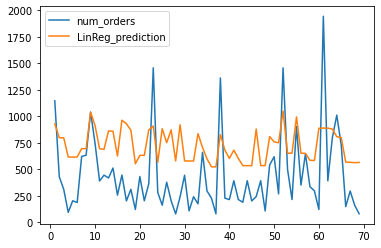

In [ ]:
Results[['num_orders','LinReg_prediction']][1:70].plot()

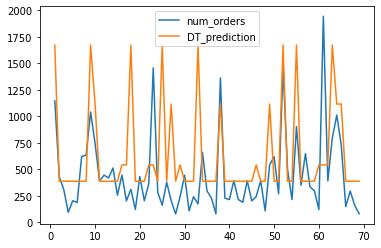

In [ ]:
# ,'',''
Results[['num_orders','DT_prediction']][1:70].plot()

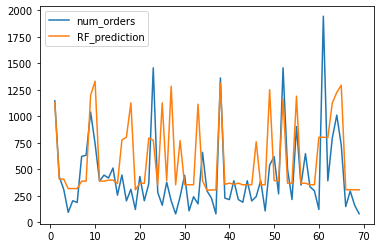

In [ ]:
Results[['num_orders','RF_prediction']][1:70].plot()

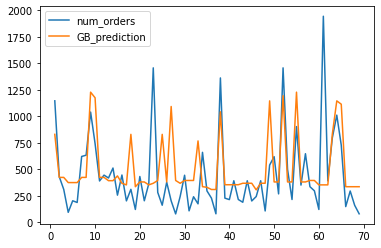

In [ ]:
Results[['num_orders','GB_prediction']][1:70].plot()

Gradient Boosted Tree Regressor performs well with minimum MSE, hence selected as the final model for forecasting number of orders.
